# Random walk 
converging to Brownian motion.

Testing notebook format, to be polished!

In [16]:
using Plots
using LaTeXStrings
using Random
rng = MersenneTwister(1234);

In [17]:
#### A simple random walk:
K = 50; # number of time steps
X = zeros(K+1); # vector to store the trajectory
X[1] = 0.0; # initial condition
for i = 2:K+1
    X[i] = X[i-1] + rand([-1,1])
end

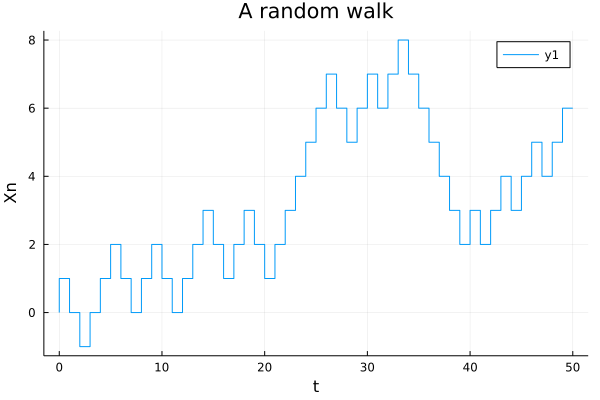

In [18]:
# Plot the trajectory

plot!(0:K, X, 
    linetype=:steppre,
    xlabel="t",
    ylabel="Xn",
    title="A random walk"
)

Now let's create a function to do this so we can look at the limit

In [19]:
## create a function that does this
function random_walk(Tf, K)
    Δt = Tf/K; # time increment
    X = zeros(K+1); # vector to store the trajectory
    X[1] = 0.0; # initial condition
    for i = 2:K+1
        X[i] = X[i-1] + sqrt(Δt)*rand([-1,1])
    end
    return Δt, X
end

random_walk (generic function with 1 method)

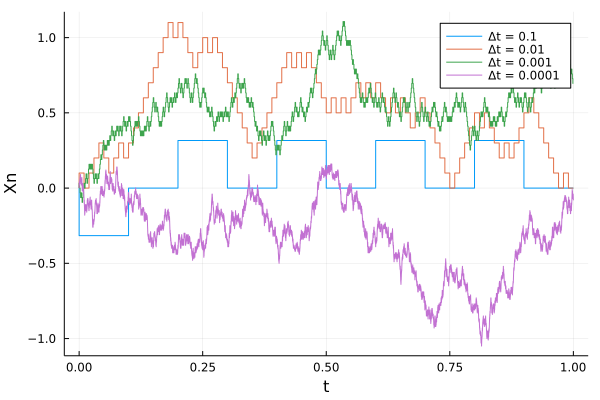

In [20]:
## Limit of random walks ##
Tf = 1; # final time
K = 10 .^(1:4); # number of time steps
plt = plot();
for k ∈ K
    Δt, X = random_walk(Tf,k)
    plot!(plt,
        0:Δt:Tf, X,
        linetype=:steppre,
        label="Δt = $Δt",
        xlabel="t",
        ylabel="Xn"
    )
end
display(plt)

We can also define a continuous time version of the same, simulate with the Gillespie SSA

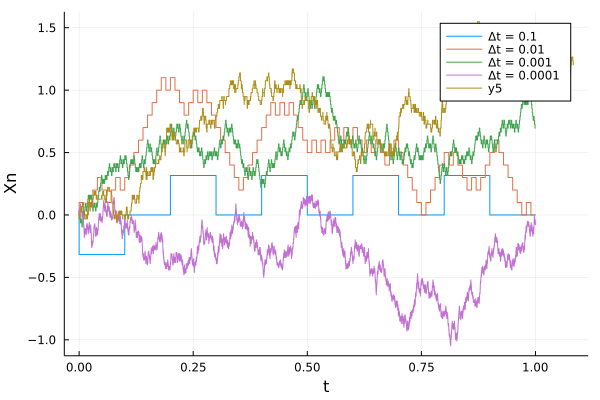

In [21]:
# Continuous time random walk with Gillespie
K = 1000; 
X = zeros(K+1);
T = zeros(K+1);
Δx = sqrt(1/K);
for k = 2:K+1
    r1,r2 = rand(2); # uniformly distributed in [0,1]
    τ = Δx^2*log(1/r1); # time next reaction
    T[k] = T[k-1] + τ; 
    if r2<1/2
        X[k] = X[k-1] - Δx;
    else
        X[k] = X[k-1] + Δx; 
    end
end
plot!(T, X,linetype=:steppre)

Now let's look at Brownian motion

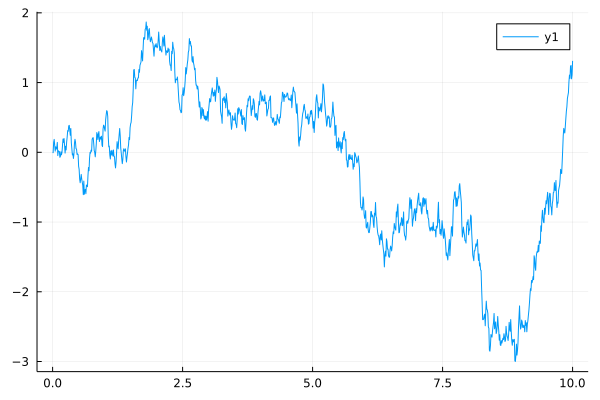

In [22]:
## Brownian motion
X = zeros(K+1);
Δt = 1e-2;
for k = 2:K+1
    X[k] = X[k-1] + sqrt(Δt)*randn() # Euler-Maruyama discretisation
end
plot(0:Δt:K*Δt, X)

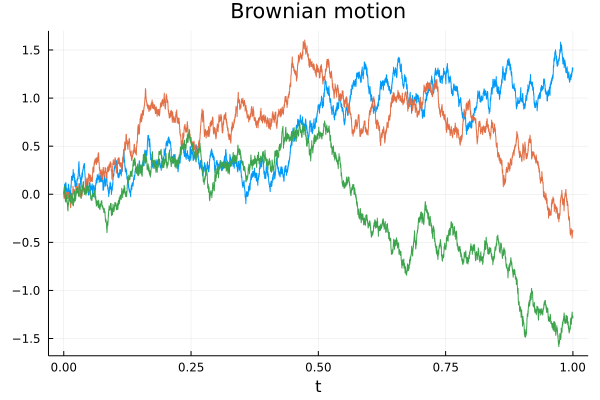

In [23]:
# As before, we define a function to do the same
function Brownian_motion(Tf, Δt, D; Ntraj=1)
    K = floor(Int,Tf/Δt); # number of steps
    X = zeros(K+1,Ntraj); # vector to store the trajectory
    xi = randn(K,Ntraj); # normally distributed increments
    X[1,:] .= 0.0; # initial condition
    X[2:end,:] .= sqrt(2*D*Δt)*cumsum(xi,dims=1);
    return 0:Δt:Tf, X
end

Tf = 1; # final time
Δt = 1e-4; # timestep
D = 1; # diffusion coefficient
t, X = Brownian_motion(Tf, Δt, D, Ntraj=3);
plot(t, X,
    legend = false,
    title = "Brownian motion",
    xlabel = "t"
)

Finally, let's look at the statistics at some time (say the final time Tf)

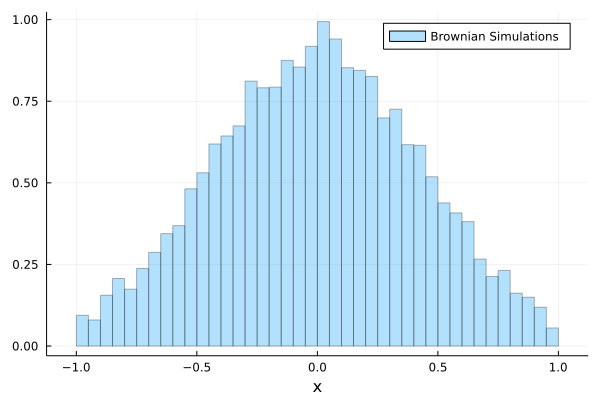

In [24]:
Ntraj = 10000; # number of trajectories
Tf = 0.1; # final time
Δt = 1e-4;
L = 1; # density in [-L, L]
D = 1;
t, W = Brownian_motion(Tf, Δt, D, Ntraj=Ntraj);
plot(t, W, legend=false)
histogram(W[end,:],
        bins = -L:0.05:L,
        normalize=true,
        label="Brownian Simulations",
        xlabel="x",
        alpha = 0.3
)

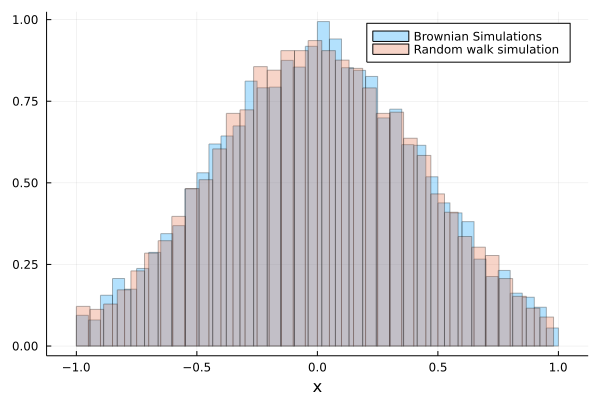

In [25]:
## Compare this to the random walk
Ntraj = 10000;
X = zeros(Ntraj);
t = 0.0;
while t<Tf
    t += Δt;
    X = X + sqrt(2*D*Δt)*rand(rng,[-1,1],Ntraj);
end
histogram!(X,
        bins = -L:4*sqrt(2*Δt):L,
        normalize=true,
        label="Random walk simulation",
        xlabel="x",
        alpha = 0.3
)

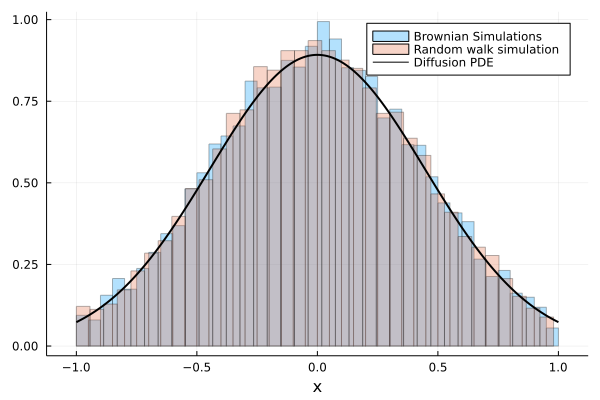

In [26]:
## Compare it to the PDE for the pdf
function HeatKernel(x,t; D=1)
    return 1.0 / sqrt(4.0*pi*D*(t)) * exp.(- x.^2 ./ (4*D*(t)));
end

x = -1:0.01:1;
plot!(x, HeatKernel(x,Tf; D=D),
    label="Diffusion PDE",
    linewidth=2,
    linecolor=:black
)